# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**: Badyn Milstein-Touesnard, Isabel Camara, Mateo Aranzazu

**ID**: 5286287, 5273977, 5355552

**NetID:**: bmm98, ic277 , ma956

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [22]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\matea\OneDrive\Documentos\Cornell\Fall 2024\BEE4750\hw2-isa-ma-bay`


In [27]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

Define the variables of the system
* $Q_{r}$ = $250000$ $\mathrm{m}^{3}/day$, initial river flow rate
* $C_{r}$ = $0.5$ $\mathrm{kg}/{1000m}^{3}$, initial river CRUD concentration 
* $Q_1$ = $40000$ $\mathrm{m}^{3}/day$, flow rate of source 1
* $C_1$ = $9$ $\mathrm{kg}/{1000m}^{3}$, CRUD concentration of source 1
* $Q_2$ = $60000$ $\mathrm{m}^{3}/day$, flow rate of source 2
* $C_2$ = $7$ $\mathrm{kg}/{1000m}^{3}$, CRUD concentration of source 2
* $U$ = 10 $km/day$, river velocity
* $k$ = $0.36$ ${day}^{-1}$, rate constant
* $x$ = distance along river, also $15 km$ between source 1 and 2
* $C_0$ = concentration when river meets source 1 after mixing
* $Q_0 = Q_r + Q_1$ flow rate when river meets source 1
* $C_{\text{R1}}$ = concentration after decay right before source 2
* $C_{\text{out}}$ = concentration at second point of mixing when river meets source 2
* $Q_{\text{out}}$ = $Q_r + Q_1 + Q_2$ = $Q_0 + Q_2$, flow rate at point $\text{R2}$

CR1_test = (QR1*C0) / (QR1+alpha*Vol)


Develop the Model

Considering the system is at steady-state:

$\frac{\partial (Mass)}{\partial t}$ = $Inputs - Outputs - Decay = 0$

$\frac{\partial (CV)}{\partial t}$ = $\sum_{j}$ $PS_j$ $-$ $CQ_{\text{out}}$ $-$ $\alpha CV$ $=$ $0$

$C(Q_{\text{out}} $+$ \alpha V)$ $=$  $\sum_{j}$ $PS_j$

$C =$ $\frac{\sum_{j} PS_j}{Q_{\text{out}} + \alpha V}$

Now, consider the system in two parts and input the point source information. Subscript $R_1$ signifies the point after point source 1 is mixed but just before point source 2, so after 15km of decay down the river. The subscript $R_2$ signifies the second point of mixing at source 2 before any distance is passed.

$C_0 =$ $\frac{Q_rC_r+Q_1C_1}{Q_r + Q_1}$

$C_{\text{R1}} =$ $\frac{Q_rC_r+Q_1C_1}{Q_0 + \alpha V} = $ $\frac{Q_0C_0}{Q_0+ \alpha V}$

$C_{\text{out}} =$ $\frac{{Q_0}C_{\text{R1}}+Q_2C_2}{Q_{out} + \alpha V}$

Assuming first order decay, replace $\alpha$ with $e^{-kx/U}$ and replace volume V with Q*t so that our final concentration models are in terms of only unknown distance x:

$C_{\text{R1}} =$ $\frac{Q_rC_r+Q_1C_1}{Q_0 + e^{-kx/U} Q_{\text{R1}}*t}$

$C_{\text{out}} =$ $\frac{Q_0C_{\text{R1}}+Q_2C_2}{Q_{\text{out}} + e^{-kx/U} Q_{\text{out}}*t}$

When solving for the out concentration, $C_{R2}$, we are looking at the concentration just after mixing. This means that the distance, x, in the decay term is 0 for our purposes but the model can be used to calculate the CRUD levels at any point downstream.

Once all of these values are plugged in and solved the result is $C_{R1} = 0.0008923717107457972 kg/m^3$ and $C_{R2} = 0.001939393703189375 kg/m^3$


### Final Concentration Equations

CRUD concentration after the river and source 1 are mixed (before decay):

$C_0 =$ $\frac{Q_rC_r+Q_1C_1}{Q_r + Q_1} = 1.67 \mathrm{kg}/{1000m}^{3}$

CRUD concentration after source 1 and source 2 are mixed:

$C_{\text{out}} =$ $\frac{Q_0C_{\text{R1}}+Q_2C_2}{Q_{\text{out}} + e^{-kx/U} Q_{\text{out}}*t} = 1.93 \mathrm{kg}/{1000m}^{3}$

Because $C_{\text{R2}}$ = 1.93 $\mathrm{kg}/{1000m}^{3}$, it falls under the regulatory limit of 2.5 $\mathrm{kg}/{1000m}^{3}$.

In [44]:
# define the variables
# C values are in kg/m3 and Q values are in m3/d
k = 0.36    # decay constant

# initial stream inputs
Cin = 0.5/1000
Qin = 250000
Q1 = 40000
C1 = 9/1000

C0 = (Cin*Qin + C1*Q1) / (Qin+Q1)
QR1 = Qin + Q1    # =Q0 above

# calculate volume
u = 10       # river velocity km/d
x = 15    # distance between sources 1 and 2 (km)
time = x/u
Vol = QR1*time
alpha = exp(-k*x/u)

# calculate the concentration just before Source 2
CR1 = ((Qin*Cin)+(Q1*C1)) / (QR1+alpha*Vol)
CR1_test = (QR1*C0) / (QR1+alpha*Vol)

Q2 = 60000
C2 = 7/1000

# Calculate the concentration just after source 2
QR2 = Qin+Q1+Q2
CR2 = (CR1*QR1+Q2*C2) / (QR2)

@show C0
@show CR1_test
@show CR1
@show CR2



C0 = 0.0016724137931034483
CR1_test = 0.0008923717107457972
CR1 = 0.0008923717107457972
CR2 = 0.001939393703189375


0.001939393703189375

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

The equilibria points are 0.3819660112501051 and 1.0000000000000002


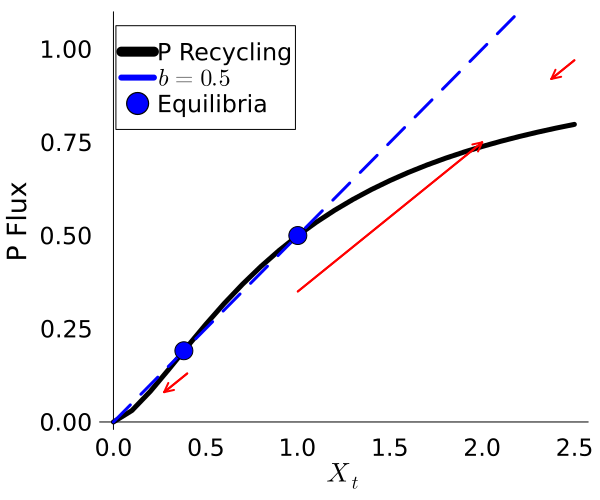

In [33]:
b = 0.5
q = 1.5
y = 0
a = 0

#lecture material 
# define functions for lake recycling and outflows
function X_recycling(X, q)
    X_recycling = X.^q ./ (1 .+ X.^q)
    return X_recycling
end

function X_outflow(X, b)
    X_outflow = b .* X
    return X_outflow
end

function X_delta(X,a)
    X_delta = a + X_recycling(X,q) - X_outflow(X,b)
    return X_delta
end 


x01=0.5
x02 = 2.2
equilibria1 = Roots.find_zero(x -> X_delta(x,a),x01) 
equilibria2 = Roots.find_zero(x -> X_delta(x,a),x02) 

println("The equilibria points are ", equilibria1, " and ", equilibria2)

T = 30
X_vals = collect(0.0:0.1:2.5)
function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t].+ X_recycling(X[t-1], q) .- X_outflow(X[t-1], b)
    end
    return X
end


X = map(x -> simulate_lake_P(x, T, 0.5, 2.5, zeros(T), zeros(T)), X_vals)
p_noinflow = plot(X, label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500), left_margin=5, bottom_margin=5)
plot!(p_noinflow, title="Lake P Without Inflows", titlefontsize=20)
display(p_noinflow)

# define range of lake states X
x = 0:0.1:2.5;

# plot recycling and outflows for selected values of b and q
p1 = plot(x, X_recycling(x, 1.5), color=:black, linewidth=5,legend=:topleft, label="P Recycling", ylabel="P Flux", xlabel=L"$X_t$", tickfontsize=16, guidefontsize=18, legendfontsize=16, palette=:tol_muted, framestyle=:zerolines, grid=:false)
plot!(x, X_outflow(x, 0.5), linewidth=3, linestyle=:dash, label=L"$b=0.5$", color=:blue)
quiver!([1], [0.35], quiver=([1], [0.4]), color=:red, linewidth=2)
quiver!([0.4], [0.13], quiver=([-0.125], [-0.05]), color=:red, linewidth=2)
quiver!([2.5], [0.97], quiver=([-0.125], [-0.05]), color=:red, linewidth=2)
plot!(ylims=(-0.02, 1.1))
plot!(size=(600, 500))
scatter!(p1, [equilibria1, equilibria2], [X_recycling(equilibria1, q), X_recycling(equilibria2, q)], label="Equilibria", markersize=10, markercolor=:blue)


In [42]:
# define functions for lake recycling and outflows
function X_recycling(X, q)
    X_recycling = X.^q ./ (1 .+ X.^q)
    return X_recycling
end

function X_outflow(X, b)
    X_outflow = b .* X
    return X_outflow
end


T = 30
X_vals = collect(0.0:0.1:2.5)
@show X_vals

function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t].+ X_recycling(X[t-1], q) .- X_outflow(X[t-1], b)
    end
    return X
end



Test = map(x -> simulate_lake_P(x, T, 0.4, 1.5, zeros(T), zeros(T)), X_vals)
@show Test
p_noinflow = plot(X_vals, label=false, ylabel=L"X_t", xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500), left_margin=5, bottom_margin=5)

plot!(p_noinflow, title="Lake P Without Inflows", titlefontsize=20)

display(p_noinflow)



X_vals = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
Test = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.1, 0.0906534300317155, 0.08096143471570921, 0.07109467064519424, 0.061260530079133416, 0.05169236101557442, 0.04263164544727194, 0.034304522211529145, 0.026896303860955824, 0.0205294294288242, 0.015250506816947538, 0.01103009378548414, 0.007775143233963769, 0.00535020327003613, 0.00360130994012046, 0.0023768571725501317, 0.0015419798476232686, 0.0009857347860840555, 0.000622388450898461, 0.00038895999873271396, 0.000241047036259494, 0.00014837062920393428, 9.082963954594534e-5, 5.536343109003593e-5, 3.362999898816279e-5, 2.0373024352527095e-5, 1.2315771277414888e-5, 7.43268352685851e-6, 4.4798738024132866e-6, 2.6974062533948244e-6], [0.2, 0.20209951522176572, 0.2045474261932636, 0.2074054

In [26]:
#part 2; repeating it with at = 0.02 for all t


`**ANSWER THIS BEFORE SUBMITTING:** What are the equilibria? What can you say about the resilience of the system?`

## References

List any external references consulted, including classmates.

* https://opentextbc.ca/pressbooks/chapter/how-do-i-write-a-fraction-in-latex/ 
* https://tex.stackexchange.com/questions/225523/how-to-write-partial-differential-equation-ex-dq-dt-ds-dt-with-real-partial-d 